# Word2Vec vs TF-IDF Score

1. Preprocessing
   1. Gather a corpus, with multiple documents from the internet.
      I recommend to start with 2 documents, and add more once everything works.
   2. Preprocess the text
2. Generate tf-idf embeddings
   1. Create a vocabulary and Bag of Words (BOW) for every document
   2. Calculate the Inverse document frequency of every word
   3. Calculate the tf-idf values for every word x every document, these are your tf-idf embeddings.
3. Getting word2vec embeddings
   1. Get the word2vec in-in enbeddng for every word in every vocabulary.
   2. Get the word2vec in-out embedding of every word in every vocabulary.
4. Visualization
   1. Reduce the dimensionality of the tf-idf embeddings with umap
   2. Visualize


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd

## Corpus Preprocessing

1. Split the Documents into sentences
2. Tokenize the sentences with spacy
4. Tokenize the words
5. Lemmas can be accessed via token.lemma_


In [8]:
import spacy

nlp = spacy.load('en_core_web_sm') # Execute only once! Very time consuming.


In [9]:

corpus_text = """The Self-Learning Systems group at Fraunhofer IIS is part of the Precise Positioning and Analytics department and located at the institute’s Nuremberg site.
Our team members have diverse academic backgrounds from computer science and engineering to physics. We combine expertise in a range of advanced machine learning (ML) topics.
One of our research goals is to provide robust and safe algorithmic solutions for control and decision-making tasks for systems in complex dynamic environments. To this end, we employ deep learning in combination with reinforcement-learning techniques. We research dependable reinforcement learning, i.e., we want to learn behaviors that are safe, performant, and explainable for many different tasks.
There is a lot to learn and develop on the way and we are eager to hear about your ideas. """

doc = nlp(corpus_text)
doc

The Self-Learning Systems group at Fraunhofer IIS is part of the Precise Positioning and Analytics department and located at the institute’s Nuremberg site.
Our team members have diverse academic backgrounds from computer science and engineering to physics. We combine expertise in a range of advanced machine learning (ML) topics.
One of our research goals is to provide robust and safe algorithmic solutions for control and decision-making tasks for systems in complex dynamic environments. To this end, we employ deep learning in combination with reinforcement-learning techniques. We research dependable reinforcement learning, i.e., we want to learn behaviors that are safe, performant, and explainable for many different tasks.
There is a lot to learn and develop on the way and we are eager to hear about your ideas. 

In [10]:
# check whether a Doc has sentence boundaries by calling Doc.has_annotation with the attribute name “SENT_START”.
print(doc.has_annotation("SENT_START"))

for sent in doc.sents:
    print(sent.text)

True
The Self-Learning Systems group at Fraunhofer IIS is part of the Precise Positioning and Analytics department and located at the institute’s Nuremberg site.

Our team members have diverse academic backgrounds from computer science and engineering to physics.
We combine expertise in a range of advanced machine learning (ML) topics.

One of our research goals is to provide robust and safe algorithmic solutions for control and decision-making tasks for systems in complex dynamic environments.
To this end, we employ deep learning in combination with reinforcement-learning techniques.
We research dependable reinforcement learning, i.e., we want to learn behaviors that are safe, performant, and explainable for many different tasks.

There is a lot to learn and develop on the way and we are eager to hear about your ideas.


In [13]:
# 1. Default: Using the Dependency Parse
for sent in doc.sents:
    print(sent.text)

The Self-Learning Systems group at Fraunhofer IIS is part of the Precise Positioning and Analytics department and located at the institute’s Nuremberg site.

Our team members have diverse academic backgrounds from computer science and engineering to physics.
We combine expertise in a range of advanced machine learning (ML) topics.

One of our research goals is to provide robust and safe algorithmic solutions for control and decision-making tasks for systems in complex dynamic environments.
To this end, we employ deep learning in combination with reinforcement-learning techniques.
We research dependable reinforcement learning, i.e., we want to learn behaviors that are safe, performant, and explainable for many different tasks.

There is a lot to learn and develop on the way and we are eager to hear about your ideas.


In [14]:
#2. Statistical Sentence Segmenter
# The statistical SentenceRecognizer is a simpler and faster alternative to the parser that only provides sentence boundaries.

In [15]:
nlp = spacy.load("en_core_web_sm", exclude=["parser"])
nlp.enable_pipe("senter")
doc = nlp(corpus_text)
for sent in doc.sents:
    print(sent.text)

The Self-Learning Systems group at Fraunhofer IIS is part of the Precise Positioning and Analytics department and located at the institute’s Nuremberg site.

Our team members have diverse academic backgrounds from computer science and engineering to physics.
We combine expertise in a range of advanced machine learning (ML) topics.

One of our research goals is to provide robust and safe algorithmic solutions for control and decision-making tasks for systems in complex dynamic environments.
To this end, we employ deep learning in combination with reinforcement-learning techniques.
We research dependable reinforcement learning, i.e., we want to learn behaviors that are safe, performant, and explainable for many different tasks.

There is a lot to learn and develop on the way and we are eager to hear about your ideas.


In [16]:
# Tokens
for sent in doc.sents:
    # sent.text
  print([(w.text) for w in sent])

['The', 'Self', '-', 'Learning', 'Systems', 'group', 'at', 'Fraunhofer', 'IIS', 'is', 'part', 'of', 'the', 'Precise', 'Positioning', 'and', 'Analytics', 'department', 'and', 'located', 'at', 'the', 'institute', '’s', 'Nuremberg', 'site', '.', '\n']
['Our', 'team', 'members', 'have', 'diverse', 'academic', 'backgrounds', 'from', 'computer', 'science', 'and', 'engineering', 'to', 'physics', '.']
['We', 'combine', 'expertise', 'in', 'a', 'range', 'of', 'advanced', 'machine', 'learning', '(', 'ML', ')', 'topics', '.', '\n']
['One', 'of', 'our', 'research', 'goals', 'is', 'to', 'provide', 'robust', 'and', 'safe', 'algorithmic', 'solutions', 'for', 'control', 'and', 'decision', '-', 'making', 'tasks', 'for', 'systems', 'in', 'complex', 'dynamic', 'environments', '.']
['To', 'this', 'end', ',', 'we', 'employ', 'deep', 'learning', 'in', 'combination', 'with', 'reinforcement', '-', 'learning', 'techniques', '.']
['We', 'research', 'dependable', 'reinforcement', 'learning', ',', 'i.e.', ',', 'we

In [17]:
# Token
docs = {}
j =0
for sent in doc.sents:
  j +=1
  docs[f'doc{j}'] = [(w) for w in sent]
  # docs[f'doc{j}'] = str(sent)

In [18]:
print(docs)

{'doc1': [The, Self, -, Learning, Systems, group, at, Fraunhofer, IIS, is, part, of, the, Precise, Positioning, and, Analytics, department, and, located, at, the, institute, ’s, Nuremberg, site, ., 
], 'doc2': [Our, team, members, have, diverse, academic, backgrounds, from, computer, science, and, engineering, to, physics, .], 'doc3': [We, combine, expertise, in, a, range, of, advanced, machine, learning, (, ML, ), topics, ., 
], 'doc4': [One, of, our, research, goals, is, to, provide, robust, and, safe, algorithmic, solutions, for, control, and, decision, -, making, tasks, for, systems, in, complex, dynamic, environments, .], 'doc5': [To, this, end, ,, we, employ, deep, learning, in, combination, with, reinforcement, -, learning, techniques, .], 'doc6': [We, research, dependable, reinforcement, learning, ,, i.e., ,, we, want, to, learn, behaviors, that, are, safe, ,, performant, ,, and, explainable, for, many, different, tasks, ., 
], 'doc7': [There, is, a, lot, to, learn, and, develo

In [19]:
for k, v in docs.items():
  # print(k , [[token.text," : ", (token.pos_, token.tag_, token.dep_), " ->> Lemmatized tokens : ", token.lemma_] for token in v])
  print(k , [(token.text, token.lemma_) for token in v])

doc1 [('The', 'the'), ('Self', 'Self'), ('-', '-'), ('Learning', 'Learning'), ('Systems', 'Systems'), ('group', 'group'), ('at', 'at'), ('Fraunhofer', 'Fraunhofer'), ('IIS', 'IIS'), ('is', 'be'), ('part', 'part'), ('of', 'of'), ('the', 'the'), ('Precise', 'Precise'), ('Positioning', 'Positioning'), ('and', 'and'), ('Analytics', 'Analytics'), ('department', 'department'), ('and', 'and'), ('located', 'locate'), ('at', 'at'), ('the', 'the'), ('institute', 'institute'), ('’s', '’s'), ('Nuremberg', 'Nuremberg'), ('site', 'site'), ('.', '.'), ('\n', '\n')]
doc2 [('Our', 'our'), ('team', 'team'), ('members', 'member'), ('have', 'have'), ('diverse', 'diverse'), ('academic', 'academic'), ('backgrounds', 'background'), ('from', 'from'), ('computer', 'computer'), ('science', 'science'), ('and', 'and'), ('engineering', 'engineering'), ('to', 'to'), ('physics', 'physics'), ('.', '.')]
doc3 [('We', 'we'), ('combine', 'combine'), ('expertise', 'expertise'), ('in', 'in'), ('a', 'a'), ('range', 'range'

In [21]:
# # Tokenization of sentenses words and lemmatizaton of the words

# for sent in doc.sents:
#   for token in sent:
#     print(token.text," : ", (token.pos_, token.tag_, token.dep_), " ->> Lemmatized tokens : ", token.lemma_)

In [39]:
# docs_dict = {
#     'doc1': ['The', 'Self', '-', 'Learning', 'Systems', 'group', 'at', 'Fraunhofer', 'IIS', 'is', 'part', 'of', 'the', 'Precise', 'Positioning', 'and', 'Analytics', 'department', 'and', 'located', 'at', 'the', 'institute', '’s', 'Nuremberg', 'site', '.'],
#     'doc2': ['Our', 'team', 'members', 'have', 'diverse', 'academic', 'backgrounds', 'from', 'computer', 'science', 'and', 'engineering', 'to', 'physics', '.'],
#     'doc3': ['We', 'combine', 'expertise', 'in', 'a', 'range', 'of', 'advanced', 'machine', 'learning', '(', 'ML', ')', 'topics', '.'],
#     'doc4': ['One', 'of', 'our', 'research', 'goals', 'is', 'to', 'provide', 'robust', 'and', 'safe', 'algorithmic', 'solutions', 'for', 'control', 'and', 'decision', '-', 'making', 'tasks', 'for', 'systems', 'in', 'complex', 'dynamic', 'environments', '.'],
#     'doc5': ['To', 'this', 'end', ',', 'we', 'employ', 'deep', 'learning', 'in', 'combination', 'with', 'reinforcement', '-', 'learning', 'techniques', '.'],
#     'doc6': ['We', 'research', 'dependable', 'reinforcement', 'learning', ',', 'i.e.', ',', 'we', 'want', 'to', 'learn', 'behaviors', 'that', 'are', 'safe', ',', 'performant', ',', 'and', 'explainable', 'for', 'many', 'different', 'tasks', '.'],
#     'doc7': ['There', 'is', 'a', 'lot', 'to', 'learn', 'and', 'develop', 'on', 'the', 'way', 'and', 'we', 'are', 'eager', 'to', 'hear', 'about', 'your', 'ideas', '.']
# }

# # Create DataFrame
# df = pd.DataFrame.from_dict(docs_dict, orient='index')

# # Transpose DataFrame
# df = df.transpose()
# df

In [23]:
# Disaplay document tokenization
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(corpus_text)
displacy.render(doc, style="dep", jupyter = True, options = {'distance':70})

## Generate tf-idf embeddings

Generate tf-idf embeddings from the previously generated tokens.
The tf-idf embeddings for all words are stored in a matrix over all words and all documents.
Every row represents one embedding.

| Word     | Doc 1 | Doc 2 | Doc 3 | Doc x |
| -------- | ----- | ----- | ----- | ----- |
| Romeo    | 3.831 | 0     | 0     | ...   |
| salad    | 0.269 | 0.152 | 0.124 | ...   |
| Falstaff | 0     | 2.478 | 0     | ...   |
| w        | ...   | ...   | ...   | ...   |

1.  Create a vocabulary and Bag of Words (BOW) for every document
2.  Calculate the Inverse document frequency of every word
3.  Calculate the tf-idf values for every word x every document, these are your tf-idf embeddings.

- You can use pandas dataframes if you want to
- Otherwise just use dictionarys, lists, etc.


## Getting word2vec embeddings


In [ ]:
!pip install gensim==3.8.3

In [44]:
import gensim
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

from gensim import corpora
from gensim.models import TfidfModel

In [45]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

word2vec = api.load('word2vec-google-news-300')


In [98]:
from gensim.models import Word2Vec
# define training data
sentences = [
    ['The', 'Self', '-', 'Learning', 'Systems', 'group', 'at', 'Fraunhofer', 'IIS', 'is', 'part', 'of', 'the', 'Precise', 'Positioning', 'and', 'Analytics', 'department', 'and', 'located', 'at', 'the', 'institute', '’s', 'Nuremberg', 'site', '.'],
    ['Our', 'team', 'members', 'have', 'diverse', 'academic', 'backgrounds', 'from', 'computer', 'science', 'and', 'engineering', 'to', 'physics', '.'],
    ['We', 'combine', 'expertise', 'in', 'a', 'range', 'of', 'advanced', 'machine', 'learning', '(', 'ML', ')', 'topics', '.'],
    ['One', 'of', 'our', 'research', 'goals', 'is', 'to', 'provide', 'robust', 'and', 'safe', 'algorithmic', 'solutions', 'for', 'control', 'and', 'decision', '-', 'making', 'tasks', 'for', 'systems', 'in', 'complex', 'dynamic', 'environments', '.'],
    ['To', 'this', 'end', ',', 'we', 'employ', 'deep', 'learning', 'in', 'combination', 'with', 'reinforcement', '-', 'learning', 'techniques', '.'],
    ['We', 'research', 'dependable', 'reinforcement', 'learning', ',', 'i.e.', ',', 'we', 'want', 'to', 'learn', 'behaviors', 'that', 'are', 'safe', ',', 'performant', ',', 'and', 'explainable', 'for', 'many', 'different', 'tasks', '.'],
    ['There', 'is', 'a', 'lot', 'to', 'learn', 'and', 'develop', 'on', 'the', 'way', 'and', 'we', 'are', 'eager', 'to', 'hear', 'about', 'your', 'ideas', '.']
]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
print(model.wv["learn"])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=100, vector_size=100, alpha=0.025>
['and', '.', 'to', ',', 'learning', 'is', 'in', 'for', 'the', 'of', 'we', '-', 'research', 'at', 'safe', 'We', 'reinforcement', 'tasks', 'learn', 'a', 'are', 'combine', 'expertise', 'academic', 'range', 'physics', 'Self', 'advanced', 'engineering', 'science', 'Learning', 'computer', 'from', 'backgrounds', 'part', 'have', 'diverse', '’s', 'Fraunhofer', 'Precise', 'Positioning', 'Analytics', 'department', 'located', 'institute', 'Nuremberg', 'IIS', 'site', 'machine', 'group', 'Systems', 'Our', 'team', 'members', 'ideas', 'topics', '(', 'ML', 'with', 'techniques', 'dependable', 'i.e.', 'want', 'behaviors', 'that', 'performant', 'explainable', 'many', 'different', 'There', 'lot', 'develop', 'on', 'way', 'eager', 'hear', 'about', 'combination', 'deep', 'employ', 'solutions', ')', 'your', 'One', 'our', 'goals', 'provide', 'robust', 'algorithmic', 'control', 'end', 'decision', 'making', 'systems', 'complex', 'dynamic', 'environments', 'To', 't

In [115]:
# X = list[model.wv.get_vecattr]

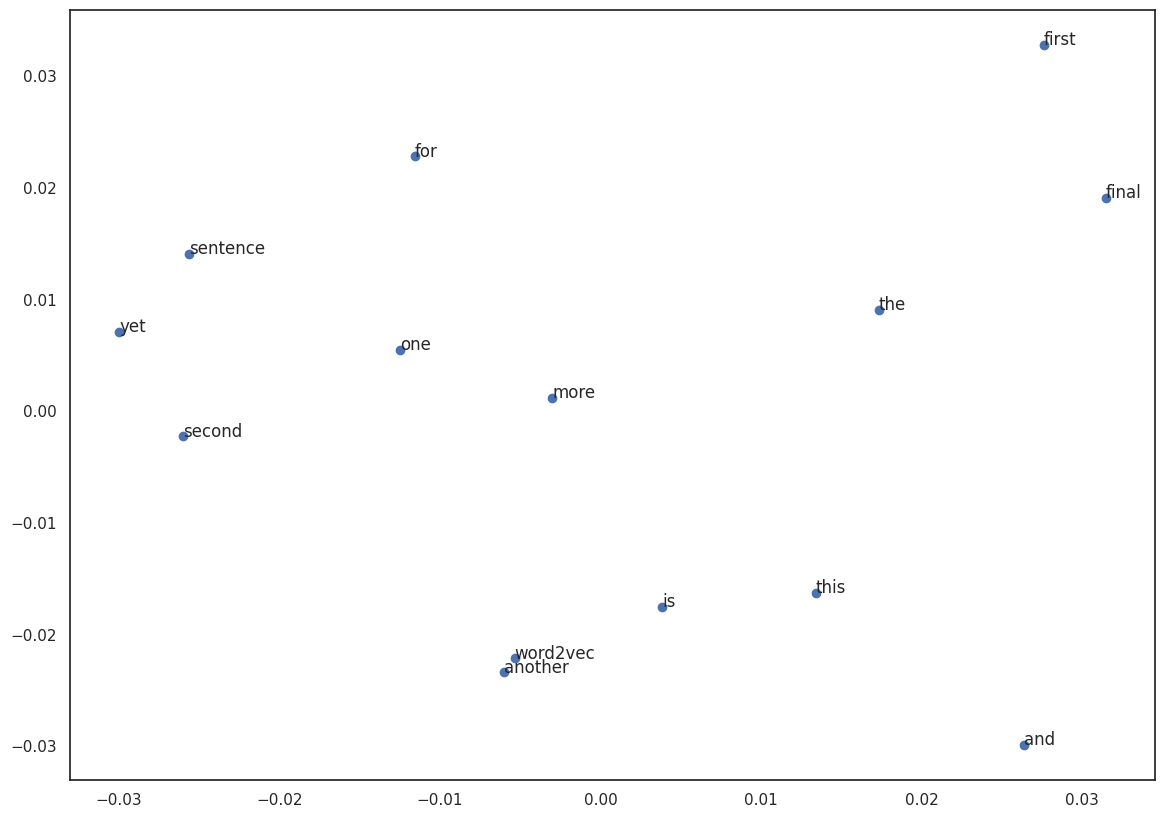

In [122]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
# sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [93]:
text = ["It was the best of times",
"it was the worst of times",
"it was the age of wisdom",
"it was the age of foolishness"]

In [43]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [46]:
doc_tokenized = list(sent_to_words(text))
dictionary = Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
BoW_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1), (7, 1), (9, 1)]]

In [47]:
for doc in BoW_corpus:
   print([[dictionary[id], freq] for id, freq in doc])

[['best', 1], ['it', 1], ['of', 1], ['the', 1], ['times', 1], ['was', 1]]
[['it', 1], ['of', 1], ['the', 1], ['times', 1], ['was', 1], ['worst', 1]]
[['it', 1], ['of', 1], ['the', 1], ['was', 1], ['age', 1], ['wisdom', 1]]
[['it', 1], ['of', 1], ['the', 1], ['was', 1], ['age', 1], ['foolishness', 1]]


In [50]:
model = TfidfModel(BoW_corpus)  # fit model
vector = model[BoW_corpus[0]]

In [55]:
import numpy as np
tfidf = TfidfModel(BoW_corpus, smartirs='ntc')

# Get the tfidf vector representation of the second sentence
for i in tfidf[BoW_corpus]:
  print(i[0])

(0, 0.8448462391634638)
(1, 0.11713529839512132)
(1, 0.11713529839512132)
(1, 0.11713529839512132)


In [67]:
# Get the tfidf transformed corpus,
# then the vector of the second sentence.
tfidf[BoW_corpus][1]

[(1, 0.11713529839512132),
 (2, 0.11713529839512132),
 (3, 0.11713529839512132),
 (4, 0.48099076877929253),
 (5, 0.11713529839512132),
 (6, 0.8448462391634637)]

In [68]:
# Now a friendlier print out
for doc in tfidf[BoW_corpus]:
   print([[dictionary[id], np.around(freq,decimals=2)] for id, freq in doc])

[['best', 0.84], ['it', 0.12], ['of', 0.12], ['the', 0.12], ['times', 0.48], ['was', 0.12]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['times', 0.48], ['was', 0.12], ['worst', 0.84]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['was', 0.12], ['age', 0.48], ['wisdom', 0.84]]
[['it', 0.12], ['of', 0.12], ['the', 0.12], ['was', 0.12], ['age', 0.48], ['foolishness', 0.84]]


In [69]:
vocab = [dictionary[i] for i in range(len(dictionary))]
vocab

['best',
 'it',
 'of',
 'the',
 'times',
 'was',
 'worst',
 'age',
 'wisdom',
 'foolishness']

In [70]:
index = list(range(len(BoW_corpus)))
index

[0, 1, 2, 3]

In [71]:
import pandas as pd
df = pd.DataFrame(data=np.zeros((len(BoW_corpus), len(vocab)), dtype=np.float16),
                  index=index,
                  columns=vocab)

In [72]:
df.T

,0,1,2,3
best,0.0,0.0,0.0,0.0
it,0.0,0.0,0.0,0.0
of,0.0,0.0,0.0,0.0
the,0.0,0.0,0.0,0.0
times,0.0,0.0,0.0,0.0
was,0.0,0.0,0.0,0.0
worst,0.0,0.0,0.0,0.0
age,0.0,0.0,0.0,0.0
wisdom,0.0,0.0,0.0,0.0
foolishness,0.0,0.0,0.0,0.0


## Visualization

- [UMAP documentation](https://umap-learn.readthedocs.io/en/latest/parameters.html)
- [Seaborn (Library for matplotlib)](https://seaborn.pydata.org/)
- [Matplotlib](https://matplotlib.org/stable/users/index.html)

1. Reduce the embeddings to 2 dimensions
2. Visualize the embeddings with a point-cloud (either seaborn or matplotlib)


In [ ]:
!pip uninstall umap
!pip install umap-learn

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x7f981bfa6320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


<Axes: >

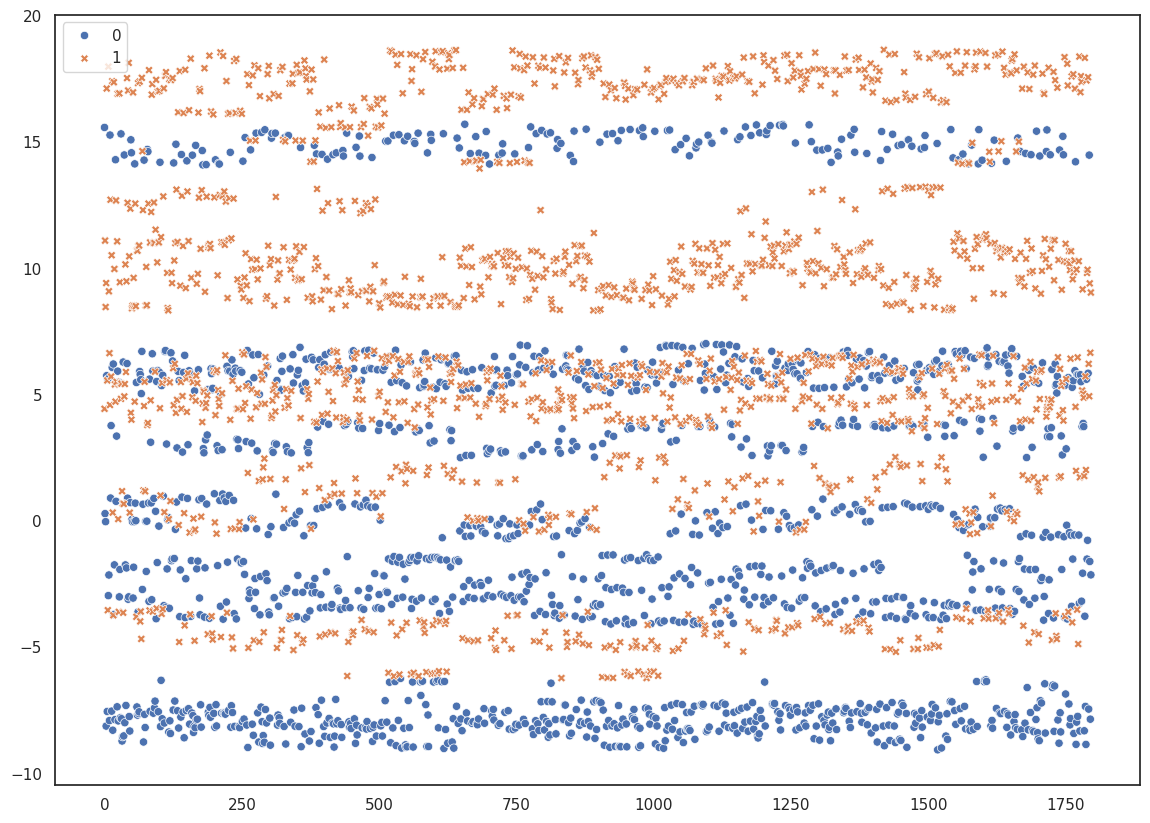

In [87]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='white', context='notebook', rc={'figure.figsize':(14,10)})

mapper = umap.UMAP
embeddings = np.zeros(shape=(20, 100))
reduced_embedding = umap.UMAP().fit_transform(embeddings)

sns.scatterplot(reduced_embedding) # Use scatterplot to visualize